nbconvert

In [ ]:
!jupyter nbconvert --to html /content/drive/MyDrive/Colab_Notebooks/CNN_Implementation.ipynb

#CNN Implementation
##October2023
###E1: Create a Dataset class to read the data. When initialized, this class should take as arguments the path to the data the transformation to be applied to each image(see TIP2)and if the dataset is train or test.If train you should load all the 5 batches that composed the whole CIFAR training set.[2.0pts]



We define the libraries that we are going to use

In [2]:
import torch
import torchvision
from torch.utils.data import Dataset
import torchvision.transforms as transforms
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import pickle
import torch.optim as optim
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Function provided from  [CIFAR-10 dataset ](https://www.cs.toronto.edu/~kriz/cifar.html)to load CIFAR-10 data from a file using pickle.

In [3]:
# Function to load CIFAR-10 data from a file using pickle
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

Custom dataset class for handling CIFAR-10 data.


In [4]:
# Constructor for CIFAR10Dataset class
class CIFAR10Dataset(Dataset):
    def __init__(self, root, transform=None, train=True):
        # Use the provided unpickle function to load CIFAR-10 data
        if train: # If 'train' is True, load training data, else load test data
            data_batch_list = [unpickle(f"{root}data_batch_{i}") for i in range(1, 6)]
            self.cifar_data = {'data': np.concatenate([batch[b'data'] for batch in data_batch_list]),
                               'labels': np.concatenate([batch[b'labels'] for batch in data_batch_list])}
        else: # Load test data using the unpickle function
            test_batch = unpickle(f"{root}/test_batch")
            self.cifar_data = {'data': test_batch[b'data'], 'labels': test_batch[b'labels']}
        self.transform = transform
        # Dictionary mapping class indices to class names
        self.classes_cifar10 = {
            0: 'Airplane', 1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer', 5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'
        }

    def __len__(self): # Return the number of samples in the dataset
        return len(self.cifar_data['data'])

    def __getitem__(self, idx): # Get a sample (image and label) at the specified index
        image, label = self.cifar_data['data'][idx], self.cifar_data['labels'][idx]
        image = image.reshape( 3, 32, 32).transpose(1, 2, 0) / 255.0
        print(type(image))
        if self.transform:
            image = self.transform(image)

        label = self.classes_cifar10[label] # Map the label index to the corresponding class name
        return image, label


TIP2: We want to normalize the images in[-1,1].
To do so you can use the torchvision package and the transforms module:

In [5]:
# Define the transformation to be applied to each image
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

TIP3: If you’re curious and want to visualize some image you can use the following function:

In [6]:
# Visualization of an image.
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Example of E1 implementation.



<class 'numpy.ndarray'>


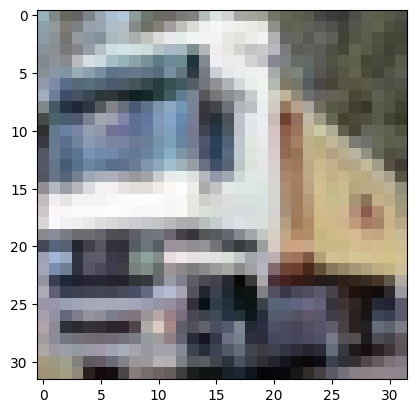

In [7]:
# Create CIFAR10Dataset instances for the training and test sets
root = ("/content/drive/MyDrive/Máster UB/Semestre3/Tècniques d'Aprenentatge Profund per a la Biomedicina/CNN Exercise/cifar-10-python/cifar-10-batches-py/")
train_dataset = CIFAR10Dataset(root, transform=transform, train=True)
# Access an example image and its label
example_image_train, example_label_train = train_dataset[1]
imshow(example_image_train) # Visualize the example image


Example using the code for visualization from pytorch.

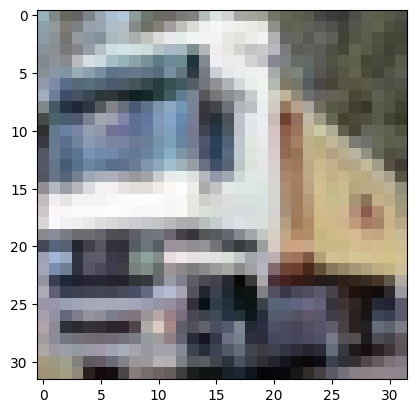

In [8]:
# show images
imshow(torchvision.utils.make_grid(example_image_train))


### E2: Build a CNN model to predict a class from the input image(you can use the Conv2D module and one of the plenty pooling layers already implemented). Good practice is to build the model class as general as possible,and the specify the hyperparaemeters when the class is called.[2.0pts]

FlexibleCNN - Custom neural network with flexible architecture

Note: The class is ultimately not implemented and is replaced by a modified version of the original obtained from pytorch.

In [9]:
"""
class FlexibleCNN(nn.Module):
    def __init__(self, layer_configs):
        super(FlexibleCNN, self).__init__()

        # Initialize the layers list
        self.layers = nn.ModuleList()

        # Iterate over the layer configurations and add corresponding layers
        for layer_config in layer_configs:
            layer_type = layer_config['type']
            if layer_type == 'conv':
                self.layers.append(nn.Conv2d(
                    in_channels=3, #in_channels (int) – Number of channels in the input image RGB = 3
                    out_channels=layer_config['out_channels'],
                    kernel_size=layer_config['kernel_size']
                ))
            elif layer_type == 'pool':
                self.layers.append(nn.MaxPool2d(
                    kernel_size=layer_config['kernel_size'],
                    stride=layer_config.get('stride', None)
                ))
            elif layer_type == 'linear':
                self.layers.append(nn.Linear(
                    in_features=layer_config['in_features'],
                    out_features=layer_config['out_features']
                ))
            else:
                raise ValueError(f"Unsupported layer type: {layer_type}")

    def forward(self, x):
        # Forward pass through all the layers
        for layer in self.layers:
            x = layer(x)
        return x
"""

'\nclass FlexibleCNN(nn.Module):\n    def __init__(self, layer_configs):\n        super(FlexibleCNN, self).__init__()\n\n        # Initialize the layers list\n        self.layers = nn.ModuleList()\n\n        # Iterate over the layer configurations and add corresponding layers\n        for layer_config in layer_configs:\n            layer_type = layer_config[\'type\']\n            if layer_type == \'conv\':\n                self.layers.append(nn.Conv2d(\n                    in_channels=3, #in_channels (int) – Number of channels in the input image RGB = 3\n                    out_channels=layer_config[\'out_channels\'],\n                    kernel_size=layer_config[\'kernel_size\']\n                ))\n            elif layer_type == \'pool\':\n                self.layers.append(nn.MaxPool2d(\n                    kernel_size=layer_config[\'kernel_size\'],\n                    stride=layer_config.get(\'stride\', None)\n                ))\n            elif layer_type == \'linear\':\n       

In [10]:
# Convolutional Neuronal Network definition.
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### Which are the main hyperparameters you should set to build the main model?
When building a Convolutional Neural Network (CNN) model, there are several hyperparameters that we need to set,
Here are the main hyperparameters, not only for this specific example.

&rarr; Convolutional Layer:
*  in_channels: The number of input channels, for RGB images this value is 3.
*  out_channels: The number of filters (or kernels) to be applied. This determines the number of output channels produced by the convolution. and there are applied in parallel with the input, so there is not a rule or a sequence for the applications of this filters.
* kernel_size: The size of the convolutional filter. It can be a single number (for a square filter) or a tuple (height, width).
* stride: The stride of the convolution. It determines the step size the filter takes when sliding over the input.

&rarr; Pooling Layer:
* kernel_size: The size of the pooling window. Similar to kernel_size in the convolutional layer.
* stride: The stride of the pooling operation. It determines the step size the pooling window takes when sliding over the input.
* padding: Padding added to both sides of the input before applying pooling. Similar to the padding in the convolutional layer.

### E3: Train and test your model
* layer2: Pooling with kernel size of 3 and a stride of 2
Which pooling is better?

I think the MaxPool2d because by selecting the maximum value, max pooling emphasizes the most important features in a given region, helping to preserve crucial information, resumen enhance the contrast.

In [11]:
class LossOptimizerWrapper:
    def __init__(self, model_parameters, learning_rate=0.001, momentum=0.9):
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.SGD(model_parameters, lr=learning_rate, momentum=momentum)

In [12]:
# Define the transformation to be applied to each image
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 4
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=0)
flexible_model = Net()
model_parameters = flexible_model.parameters()
loss_optimizer_wrapper = LossOptimizerWrapper(model_parameters)
criterion = loss_optimizer_wrapper.criterion
optimizer = loss_optimizer_wrapper.optimizer
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]

        inputs, labels = data
        #print(inputs)
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = flexible_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

100%|██████████| 170498071/170498071 [00:10<00:00, 16052107.01it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
[1,  2000] loss: 2.143
[1,  4000] loss: 1.814
[1,  6000] loss: 1.670
[1,  8000] loss: 1.552
[1, 10000] loss: 1.485
[1, 12000] loss: 1.443
[2,  2000] loss: 1.360
[2,  4000] loss: 1.339
[2,  6000] loss: 1.308
[2,  8000] loss: 1.306
[2, 10000] loss: 1.287
[2, 12000] loss: 1.253
Finished Training
